# Simulating Brownian Motion: A Monte Carlo Approach to Diffusion

Brownian motion, first observed by botanist Robert Brown in 1827, describes the erratic, random motion of microscopic particles suspended in a fluid. This phenomenon arises due to collisions between the particles and the molecules of the surrounding medium, and it serves as a foundational concept in statistical mechanics and stochastic processes.

In this assignment, we will use Monte Carlo methods to simulate Brownian motion in one and two dimensions. The goal is to model the random trajectories of particles, compute statistical measures like the mean squared displacement (MSD), and compare the simulation results to theoretical predictions derived from the diffusion equation.

This project demonstrates how statistical models, such as random walks, can be used to explore and analyze physical phenomena.


## Problem Setup

### Key Equations and Concepts

1. **Random Walk Model**:
   Brownian motion can be modeled as a random walk where particles move in discrete steps. In one dimension, the position of a particle at time $ t $ is given by:
   $$
   x_{i+1} = x_i + \Delta x
   $$
   where $ \Delta x $ is a random step size drawn from a normal distribution:
   $$
   \Delta x \sim \mathcal{N}(0, \sigma^2)
   $$

   In two dimensions, the particle's position is described by:
   $$
   \begin{aligned}
   x_{i+1} &= x_i + \Delta x, \quad \Delta x \sim \mathcal{N}(0, \sigma_x^2) \\
   y_{i+1} &= y_i + \Delta y, \quad \Delta y \sim \mathcal{N}(0, \sigma_y^2)
   \end{aligned}
   $$

2. **Mean Squared Displacement (MSD)**:
   The MSD quantifies how far particles move on average as a function of time. In $ n $-dimensional space, the MSD is given by:
   $$
   \langle r^2(t) \rangle = 2nDt
   $$
   where:
   - $ n $: Number of spatial dimensions (1 for 1D, 2 for 2D).
   - $ D $: Diffusion coefficient.
   - $ t $: Time.

3. **Diffusion Coefficient**:
   The diffusion coefficient $ D $ relates to the variance $ \sigma^2 $ of the step size by:
   $$
   D = \frac{\sigma^2}{2\Delta t}
   $$

### Parameters for Simulation
- **Number of Particles ($ N $)**: Total particles in the simulation.
- **Simulation Time ($ T $)**: Total duration of the simulation.
- **Time Step ($ \Delta t $)**: Interval between successive particle movements.
- **Step Variance ($ \sigma^2 $)**: Variance of the particle step size, which determines the diffusion rate.

### Objectives
- Simulate the random motion of particles in 1D and 2D using Monte Carlo methods.
- Compute and visualize the mean squared displacement (MSD) over time.
- Compare the simulation results to theoretical predictions.
- Investigate the impact of varying parameters such as the diffusion coefficient and step size.

This setup provides the foundation for understanding how Brownian motion can be modeled statistically and analyzed computationally.


## Simulation

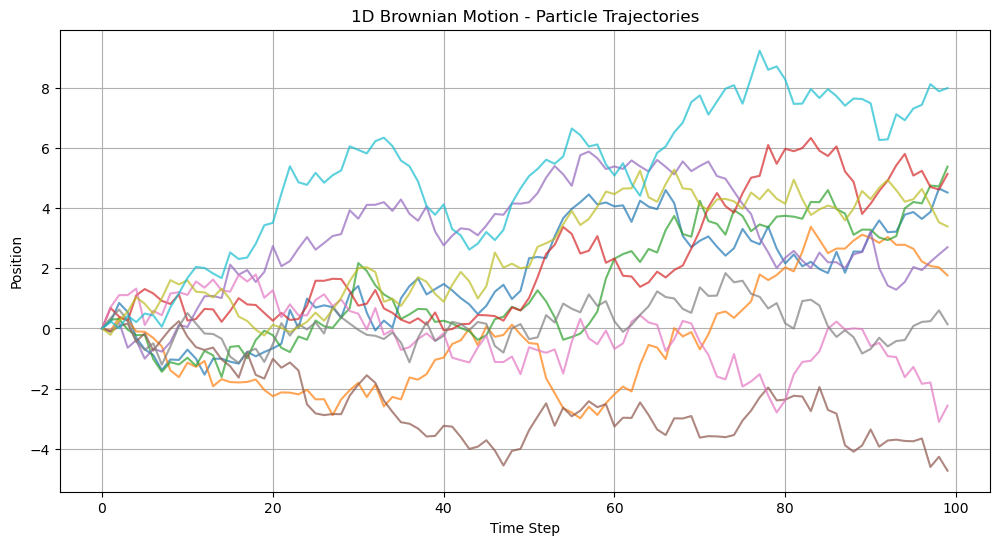

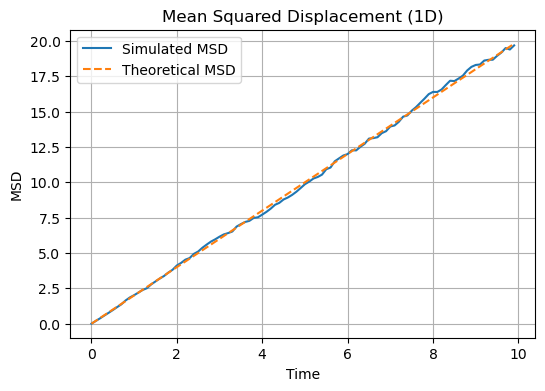

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Parameters
N = 1000  # Number of particles
T = 100  # Total number of time steps
dt = 0.1  # Time step size
D = 1.0  # Diffusion coefficient
sigma = np.sqrt(2 * D * dt)  # Step size standard deviation

# 1D Brownian Motion
def simulate_brownian_motion_1D(N, T, sigma):
    np.random.seed(42)  # Set random seed for reproducibility
    # Initialize positions of all particles
    positions = np.zeros((N, T))
    
    # Generate random steps for all particles
    for t in range(1, T):
        steps = np.random.normal(0, sigma, size=N)  # Random steps
        positions[:, t] = positions[:, t-1] + steps  # Update positions

    return positions

# 2D Brownian Motion
def simulate_brownian_motion_2D(N, T, sigma):
    np.random.seed(42)  # Set random seed for reproducibility
    # Initialize positions for x and y dimensions
    positions_x = np.zeros((N, T))
    positions_y = np.zeros((N, T))
    
    # Generate random steps for all particles
    for t in range(1, T):
        steps_x = np.random.normal(0, sigma, size=N)  # Steps in x
        steps_y = np.random.normal(0, sigma, size=N)  # Steps in y
        positions_x[:, t] = positions_x[:, t-1] + steps_x  # Update x positions
        positions_y[:, t] = positions_y[:, t-1] + steps_y  # Update y positions

    return positions_x, positions_y

# Calculate MSD for 2D Brownian motion
def calculate_msd_2D(positions_x, positions_y):
    # Compute squared displacement for each particle
    squared_displacement = positions_x**2 + positions_y**2
    
    # Average over all particles at each time step
    msd = np.mean(squared_displacement, axis=0)
    
    return msd

# Simulate 1D Brownian motion
positions_1D = simulate_brownian_motion_1D(N, T, sigma)

# Simulate 2D Brownian motion
positions_2D_x, positions_2D_y = simulate_brownian_motion_2D(N, T, sigma)

# Calculate MSD for 1D
msd_1D = np.mean(positions_1D**2, axis=0)

# Plot 1D Particle Trajectories
plt.figure(figsize=(12, 6))
for i in range(10):  # Plot only 10 particles for clarity
    plt.plot(positions_1D[i], alpha=0.7)
plt.title("1D Brownian Motion - Particle Trajectories")
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.grid()
plt.show()

# Plot MSD for 1D
plt.figure(figsize=(6, 4))
time = np.arange(T) * dt
plt.plot(time, msd_1D, label="Simulated MSD")
plt.plot(time, 2 * D * time, label="Theoretical MSD", linestyle="--")
plt.title("Mean Squared Displacement (1D)")
plt.xlabel("Time")
plt.ylabel("MSD")
plt.legend()
plt.grid()
plt.show()


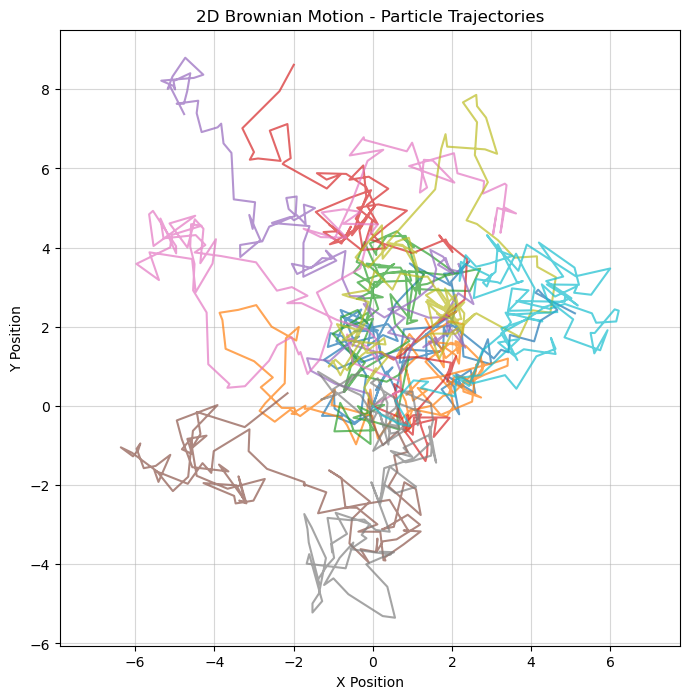

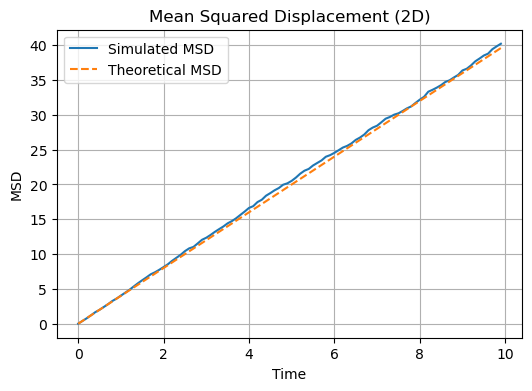

In [2]:
# Plot 2D Particle Trajectories
plt.figure(figsize=(8, 8))
for i in range(10):  # Plot only 10 particles for clarity
    plt.plot(positions_2D_x[i], positions_2D_y[i], alpha=0.7)
plt.title("2D Brownian Motion - Particle Trajectories")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(alpha=0.5)
plt.axis("equal")
plt.show()

# Calculate MSD for 2D
msd_2d = calculate_msd_2D(positions_2D_x, positions_2D_y)

# Plot MSD for 2D
plt.figure(figsize=(6, 4))
time = np.arange(T) * dt
plt.plot(time, msd_2d, label="Simulated MSD")
plt.plot(time, 4 * D * time, label="Theoretical MSD", linestyle="--")
plt.title("Mean Squared Displacement (2D)")
plt.xlabel("Time")
plt.ylabel("MSD")
plt.legend()
plt.grid()
plt.show()

## Analysis

### 1. Statistical Validation of Results

- Displacement Distribution:
Verify that the displacement at a given time follows a Gaussian distribution, as expected for Brownian motion. Plot histograms of the x and y displacements at different time steps and fit Gaussian curves.

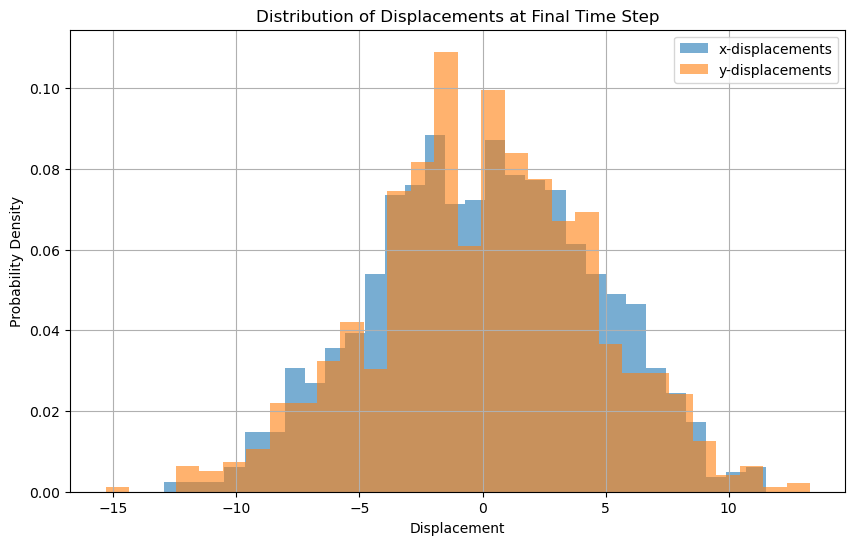

In [3]:
final_time_displacements_x = positions_2D_x[:, -1]
final_time_displacements_y = positions_2D_y[:, -1]

plt.figure(figsize=(10, 6))
plt.hist(final_time_displacements_x, bins=30, density=True, alpha=0.6, label='x-displacements')
plt.hist(final_time_displacements_y, bins=30, density=True, alpha=0.6, label='y-displacements')
plt.title("Distribution of Displacements at Final Time Step")
plt.xlabel("Displacement")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()

### 2. Parameter Sensitivity Analysis

Investigate how varying key parameters affects the results:
- Diffusion Coefficient $(D)$: Simulate with different values of D and compare the MSD results.

- Number of Particles $(N)$: Analyze how the MSD accuracy improves with larger particle ensembles.

- Time Step $(\delta t)$: Investigate the trade-off between accuracy and computational cost when changing $\delta t$.


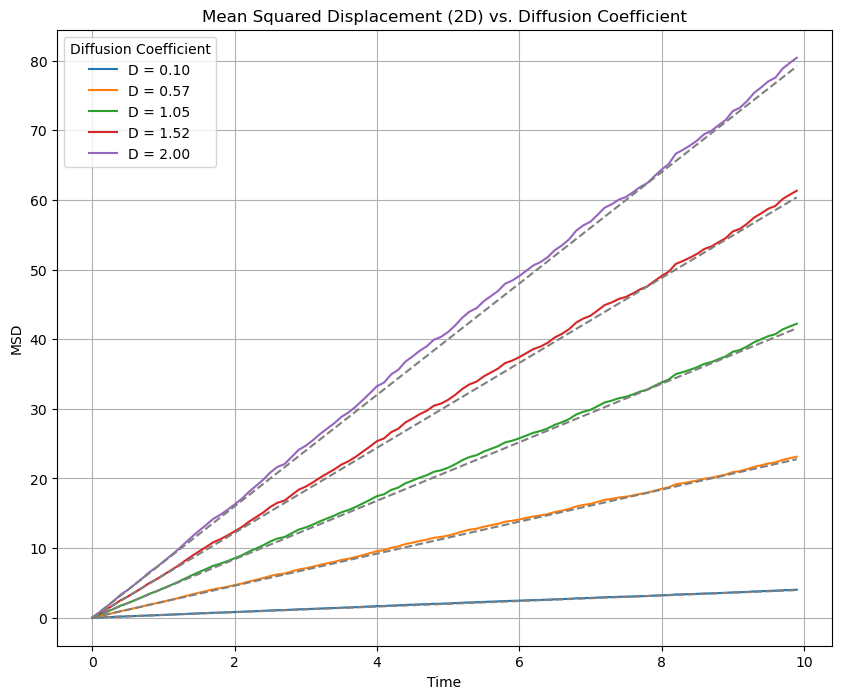

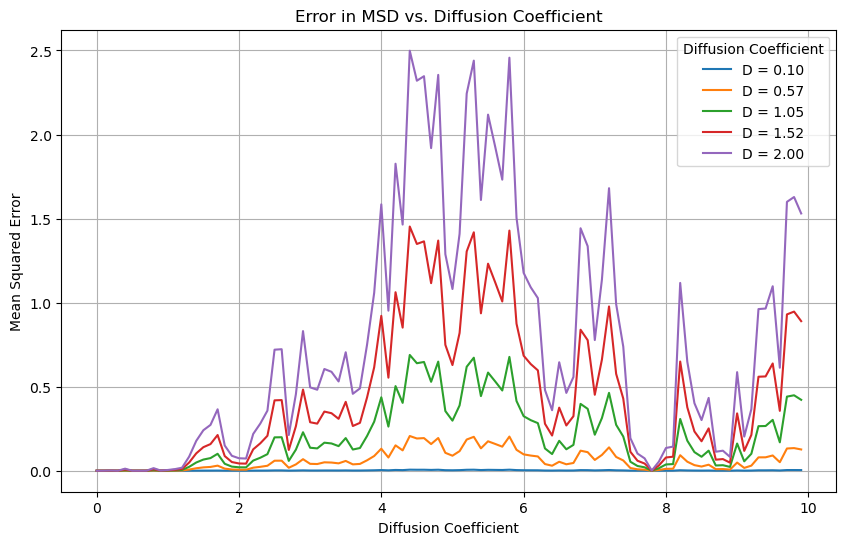

In [4]:
# Plot MSD vs. D for 2D Brownian motion
D_values = np.linspace(0.1, 2.0, 5)
plt.figure(figsize=(10, 8))
time = np.arange(T) * dt
errors = {}
for D in D_values:
    sigma = np.sqrt(2 * D * dt)
    positions_2D_x, positions_2D_y = simulate_brownian_motion_2D(N, T, sigma)
    msd = calculate_msd_2D(positions_2D_x, positions_2D_y)
    plt.plot(time, msd, label=f"D = {D:.2f}")
    plt.plot(time, 4 * D * time, linestyle="--", color='gray')
    errors[D] = np.abs((msd - 4 * D * time)**2)

plt.title("Mean Squared Displacement (2D) vs. Diffusion Coefficient")
plt.xlabel("Time")
plt.ylabel("MSD")
plt.legend(title="Diffusion Coefficient")
plt.grid()
plt.show()

# Plot errors vs. D
plt.figure(figsize=(10, 6))
for D in D_values:
    plt.plot(time, errors[D], label=f"D = {D:.2f}")
plt.title("Error in MSD vs. Diffusion Coefficient")
plt.xlabel("Diffusion Coefficient")
plt.ylabel("Mean Squared Error")
plt.legend(title="Diffusion Coefficient")
plt.grid()
plt.show()

It looks like there is an apparent positive relation between the diffusion coefficient $(D)$ and MSD. For a higher $D$, we see higher errors on average.

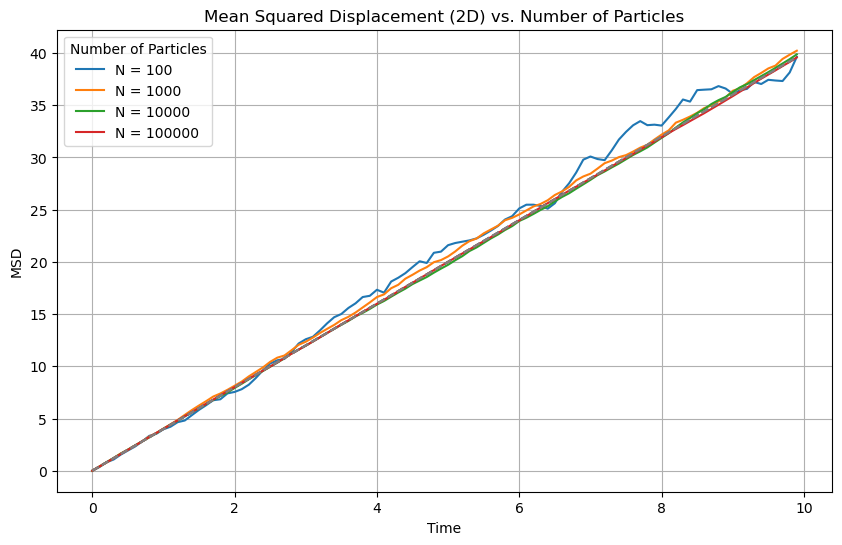

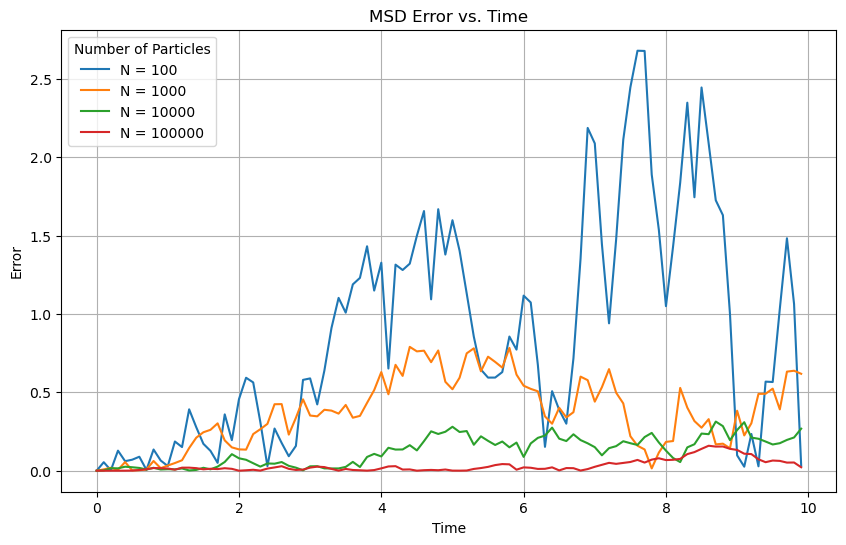

In [5]:
# Plot MSD accuracy vs. number of particles for 2D Brownian motion
N_values = [100, 1000, 10000, 100000]
D = 1.0
plt.figure(figsize=(10, 6))
time = np.arange(T) * dt
errors = {}
for N in N_values:
    sigma = np.sqrt(2 * D * dt)
    positions_2D_x, positions_2D_y = simulate_brownian_motion_2D(N, T, sigma)
    msd = calculate_msd_2D(positions_2D_x, positions_2D_y)
    plt.plot(time, msd, label=f"N = {N}")
    plt.plot(time, 4 * D * time, linestyle="--", color='gray')
    errors[N] = np.abs(msd - 4 * D * time)

plt.title("Mean Squared Displacement (2D) vs. Number of Particles")
plt.xlabel("Time")
plt.ylabel("MSD")
plt.legend(title="Number of Particles")
plt.grid()
plt.show()

# Plot errors
plt.figure(figsize=(10, 6))
for N in N_values:
    plt.plot(time, errors[N], label=f"N = {N}")
plt.title("MSD Error vs. Time")
plt.xlabel("Time")
plt.ylabel("Error")
plt.legend(title="Number of Particles")
plt.grid()
plt.show()

As expected, increasing the number of particles increases the accuracy of the estimation.

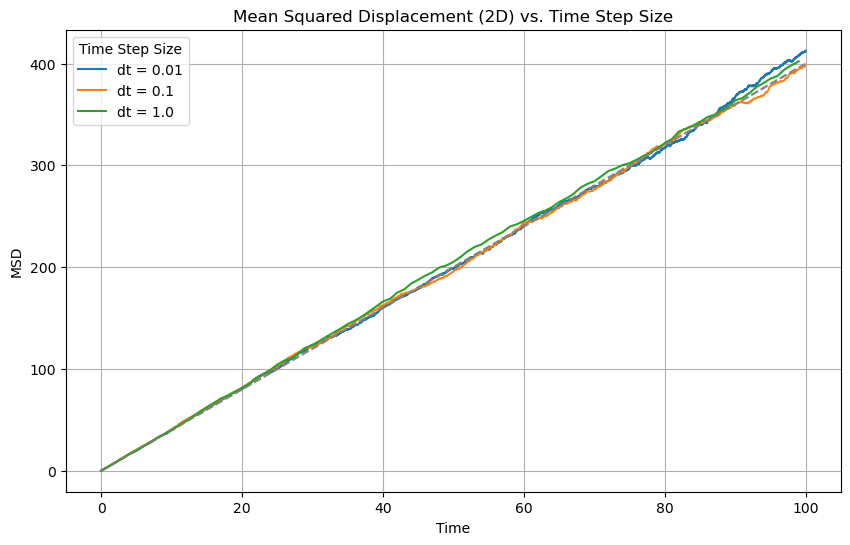

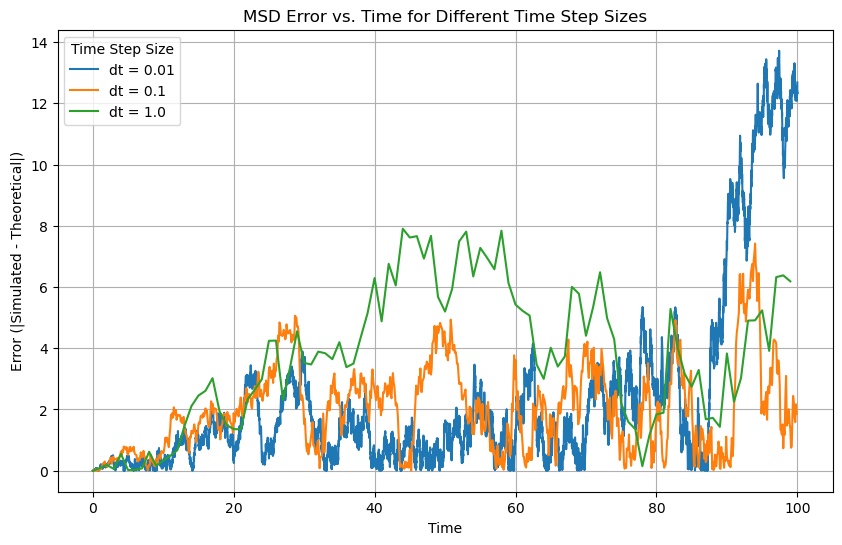

In [6]:
# Plot MSD accuracy vs. time step size for 2D Brownian motion
N = 1000  
D = 1.0 
T = 100  # Number of time steps
dt_values = [0.01, 0.1, 1.0] 
errors = {}

plt.figure(figsize=(10, 6))

for dt in dt_values:
    num_steps = int(T / dt)  # Adjust the number of steps based on dt
    sigma = np.sqrt(2 * D * dt)  
    positions_2D_x, positions_2D_y = simulate_brownian_motion_2D(N, num_steps, sigma)
    msd = calculate_msd_2D(positions_2D_x, positions_2D_y)
    time = np.arange(num_steps) * dt 
    plt.plot(time, msd, label=f"dt = {dt}")
    plt.plot(time, 4 * D * time, linestyle="--", color='gray', alpha=0.6)
    errors[dt] = np.abs(msd - 4 * D * time)

plt.title("Mean Squared Displacement (2D) vs. Time Step Size")
plt.xlabel("Time")
plt.ylabel("MSD")
plt.legend(title="Time Step Size")
plt.grid()
plt.show()

# Plot errors vs. time for different time step sizes
plt.figure(figsize=(10, 6))

for dt in dt_values:
    num_steps = int(T / dt)  # Adjust the number of steps based on dt
    time = np.arange(num_steps) * dt  
    plt.plot(time, errors[dt], label=f"dt = {dt}")

plt.title("MSD Error vs. Time for Different Time Step Sizes")
plt.xlabel("Time")
plt.ylabel("Error (|Simulated - Theoretical|)")
plt.legend(title="Time Step Size")
plt.grid()
plt.show()


Again, there is not much of a relation. For the largest step size we see the lowest error which seems counter-intuitive.

## Extra Credit - Simulate Brownian Motion

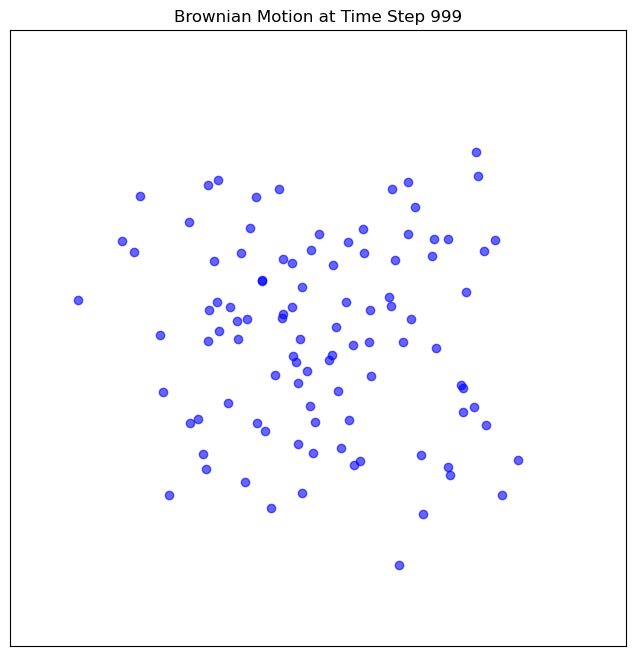

In [8]:
# Animation of 2D Brownian motion trajectories
import matplotlib.animation as animation
from IPython.display import HTML, Video
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['animation.ffmpeg_path'] = '/opt/homebrew/bin/ffmpeg' 

# Parameters
N = 100 
T = 1000  # Total time steps
D = 1.0  # Diffusion coefficient
dt = 0.1 
sigma = np.sqrt(2 * D * dt) 

# Initialize random starting positions
initial_positions_x = np.random.uniform(-50, 50, N)
initial_positions_y = np.random.uniform(-50, 50, N)

# Simulate Brownian motion with initial random positions
def simulate_brownian_motion_2D_with_initial(N, T, sigma, initial_x, initial_y):
    positions_x = np.zeros((N, T))
    positions_y = np.zeros((N, T))
    
    positions_x[:, 0] = initial_x
    positions_y[:, 0] = initial_y

    # Simulate motion
    for t in range(1, T):
        steps_x = np.random.normal(0, sigma, size=N)
        steps_y = np.random.normal(0, sigma, size=N)
        positions_x[:, t] = positions_x[:, t-1] + steps_x
        positions_y[:, t] = positions_y[:, t-1] + steps_y
    
    return positions_x, positions_y

# Run the simulation
positions_2D_x, positions_2D_y = simulate_brownian_motion_2D_with_initial(
    N, T, sigma, initial_positions_x, initial_positions_y
)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_aspect('equal')
ax.grid(False)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

# Initialize particles at random starting positions
particles, = ax.plot(positions_2D_x[:, 0], positions_2D_y[:, 0], 'bo', alpha=0.6)

# Update function for animation
def update(frame):
    """Update particle positions for the animation."""
    particles.set_data(positions_2D_x[:, frame], positions_2D_y[:, frame])
    ax.set_title(f"Brownian Motion at Time Step {frame}")
    return particles,

# Create animation
ani = animation.FuncAnimation(
    fig, update, frames=T, interval=50, blit=True
)

# Display the animation in a Jupyter Notebook
HTML(ani.to_html5_video())

# Save the animation as a video file
ani.save('brownian_motion.mp4', writer='ffmpeg', fps=30)

# Display the saved video
Video("brownian_motion.mp4", width=600, height=600)

## References and Readings
1. [Oscar Mickelin's Brownian Motion Analysis](https://web.mit.edu/8.334/www/grades/projects/projects17/OscarMickelin/brownian.html)

2. [This webpage using a Monte Carlo method to plot Brownian Motion in Python](https://www.quantstart.com/articles/brownian-motion-simulation-with-python/)